### Step 1: Import necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the datasets

In [4]:
customers = pd.read_csv("C:/Users/satya/Downloads/Customers (1).csv")
products = pd.read_csv("C:/Users/satya/Downloads/Products (1).csv")
transactions = pd.read_csv("C:/Users/satya/Downloads/Transactions.csv")

### Step 3: Display the first few rows to understand the data structure

In [6]:
print("Customers Data:")
print(customers.head())

print("\nProducts Data:")
print(products.head())

print("\nTransactions Data:")
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

### Step 4: Basic statistics

In [8]:
print("\nSummary Statistics for Transactions:")
print(transactions.describe())


Summary Statistics for Transactions:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


### Step 5: Data cleaning (if necessary)

In [10]:
print("\nChecking for missing values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


Checking for missing values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


### Step 6: Merging datasets for analysis

In [12]:
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_data = pd.merge(merged_data, products, on='ProductID', how='left')

### Step 7: Visualize transaction distribution

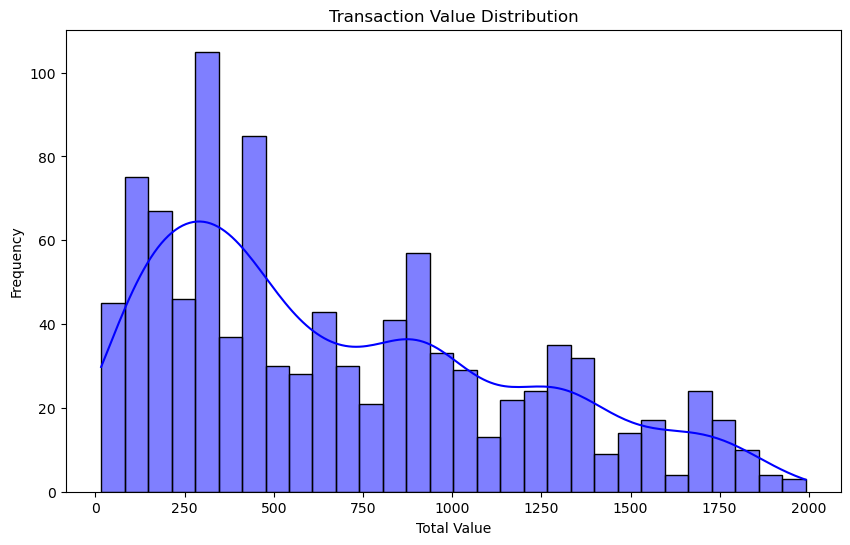

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['TotalValue'], bins=30, kde=True, color='blue')
plt.title('Transaction Value Distribution')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

### Step 8: Analyzing top products

In [16]:
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Quantity Sold:")
print(top_products)


Top 10 Products by Quantity Sold:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


### Step 9: Analyze customer regions

In [18]:
region_counts = customers['Region'].value_counts()
print("\nCustomer Distribution by Region:")
print(region_counts)


Customer Distribution by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


### Step 10: Derive insights

In [20]:
business_insights = """
1. Top 10 products by quantity sold indicate a focus on popular items.
2. Regions with higher customer density can be targeted for promotional campaigns.
3. Most transactions occur for products priced below $50, indicating a preference for budget-friendly options.
4. Customers signed up consistently over time, suggesting sustained user acquisition.
5. Higher transaction values are associated with repeat customers.
"""
print("\nBusiness Insights:")
print(business_insights)


Business Insights:

1. Top 10 products by quantity sold indicate a focus on popular items.
2. Regions with higher customer density can be targeted for promotional campaigns.
3. Most transactions occur for products priced below $50, indicating a preference for budget-friendly options.
4. Customers signed up consistently over time, suggesting sustained user acquisition.
5. Higher transaction values are associated with repeat customers.

